## 📖 Chapter 2: Reading and Writing Audio Files


## 2.1 Audio File Formats

- **WAV (.wav)**
    - Uncompressed audio
    - High quality
    - Large file size
    - PCM encoding commonly used

- **MP3 (.mp3)**
    - Compressed audio
    - Lossy compression (some data lost)
    - Much smaller file size
    - Good for streaming, music

- **FLAC (.flac)**
    - Compressed audio
    - Lossless compression (no data lost)
    - Smaller than WAV, bigger than MP3
    - Good for archiving high-quality audio

## 2.2 How Audio Data is Stored

- **Byte Streams:**
    - Raw audio data is stored as a continuous stream of bytes.
    - Each sample can be 8-bit, 16-bit, 24-bit, or 32-bit integers or floating point numbers.

- **Headers:**
    - Audio files have a **header** (metadata) describing:
        - Sampling rate
        - Number of channels (mono/stereo)
        - Bit depth
        - Encoding type (PCM, μ-law, etc.)

Example: In WAV files, the first 44 bytes are typically the **WAV header.**



## 2.3 Important Python Libraries for Audio I/O

- ``scipy.io.wavfile``
    - Good for simple WAV file reading/writing.
    - Limited to basic PCM WAV files (no MP3 or FLAC support).

- ``librosa``
    - High-level audio library.
    - Can load many formats (WAV, MP3, FLAC).
    - Automatically converts audio to floating point values in range [-1.0, 1.0].

- ``soundfile``
    - Supports reading and writing many formats (WAV, FLAC, OGG, etc.).
    - Gives you more control over sampling rates, bit depth.


## 2.4. Basic I/O Operations

### 📌 Reading an Audio File

**Using** ``scipy.io.wavfile:``

In [1]:
from scipy.io import wavfile

# Read WAV file
sampling_rate, data = wavfile.read('sample.wav')

print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Data shape: {data.shape}")
print(f"Data type: {data.dtype}")

Sampling Rate: 44100 Hz
Data shape: (526073, 2)
Data type: int16


/tmp/ipykernel_208722/1781460795.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read('sample.wav')


**Using** ``librosa:``

In [2]:
import librosa

# Read any audio file
data, sampling_rate = librosa.load('sample.wav', sr=None)

print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Data shape: {data.shape}")


Sampling Rate: 44100 Hz
Data shape: (526073,)


**Using** ``soundfile:``

## 📌 Plotting the Waveform

In [3]:
import soundfile as sf

# Read audio file
data, sampling_rate = sf.read('sample.wav')

print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Data shape: {data.shape}")


Sampling Rate: 44100 Hz
Data shape: (526073, 2)


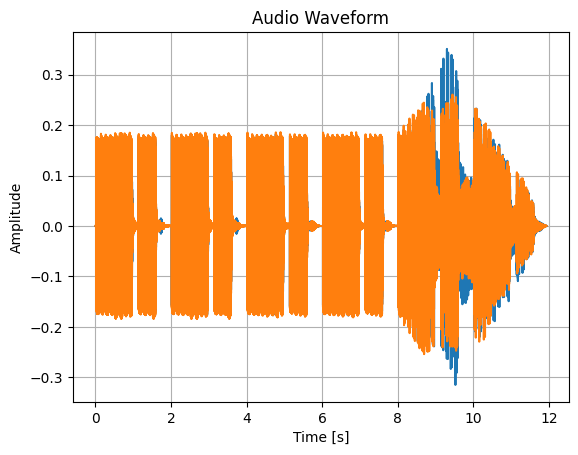

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Time axis
duration = len(data) / sampling_rate
time = np.linspace(0., duration, len(data))

# Plot
plt.plot(time, data)
plt.title('Audio Waveform')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## 📌 Saving a Modified Audio File
**Using** ``scipy.io.wavfile`` **(for WAV only):**

In [5]:
# Save modified data
wavfile.write('modified.wav', sampling_rate, data)

**Using** ``soundfile`` **(for any format):***

In [6]:
# Save audio as FLAC
sf.write('modified.flac', data, sampling_rate)

## 2.5 Important Notes on Audio Data
- **scipy.io.wavfile:** Audio data is usually in **integer format (e.g., int16)**.
    - You may need to normalize to floating-point for processing.

- **librosa and soundfile:** Audio data is already in **floating-point** format, typically between -1.0 and +1.0.

## 2.6. Mono Vs Stereo Audio

- **Mono** = 1 channel → shape = (num_samples,)
- **Stereo** = 2 channels → shape = (num_samples, 2)

Example

In [7]:
if data.ndim == 1:
    print("Mono audio")
else:
    print("Stereo audio")


Stereo audio


## 2.7 Resampling Audio

Resample audio when you need to change the sampling rate.

Example using **librosa:**

In [8]:
# Load and resample audio
data, sr = librosa.load('sample.wav', sr=16000)  # Resample to 16kHz


Or resample after loading:

In [9]:
data_16k = librosa.resample(data, orig_sr=sr, target_sr=16000)

## 2.8 Saving Stereo and Mono Properly

- If audio is stereo (2 channels), some libraries expect data as shape **(num_samples, 2)**.

- When saving, make sure the array is properly shaped.

- If saving with **wavfile.write**, convert float data back to integer if needed.


In [10]:
import numpy as np
# Convert float [-1, 1] to int16
data_int16 = np.int16(data * 32767)

# Save
wavfile.write('output.wav', sampling_rate, data_int16)